In [1]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score
data = pd.read_csv ('SVMdataset.csv')
print(data)

           x1        x2  y
0    0.107143  0.603070  1
1    0.093318  0.649854  1
2    0.097926  0.705409  1
3    0.155530  0.784357  1
4    0.210829  0.866228  1
..        ...       ... ..
858  0.994240  0.516667  1
859  0.964286  0.472807  1
860  0.975806  0.439474  1
861  0.989631  0.425439  1
862  0.996544  0.414912  1

[863 rows x 3 columns]


Text(0.5, 1.0, 'SVM training set')

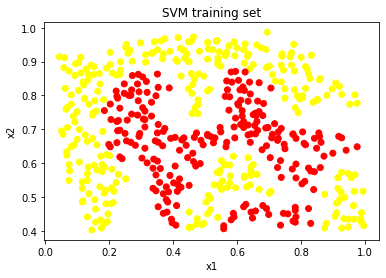

In [2]:
X=data.iloc[:,:-1].values
y=data.iloc[:,2].values


X_train, X_temp, y_train, y_temp = train_test_split(X,y,train_size=0.6,random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp,train_size=0.6,random_state=0)


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('SVM training set')


Text(0.5, 1.0, 'SVM testing set')

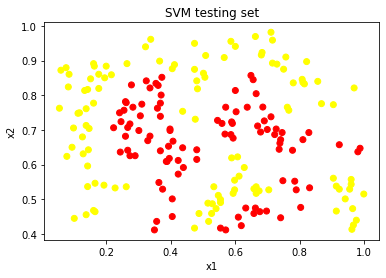

In [3]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn')
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('SVM testing set')

Text(0.5, 1.0, 'SVM valid set')

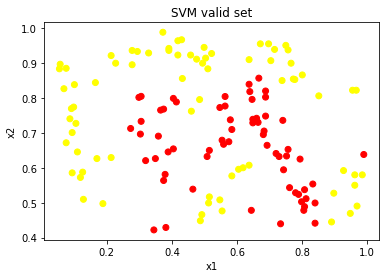

In [4]:
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='autumn')
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('SVM valid set')

In [5]:

best_C = None
best_score=0
for C in np.arange(0.05, 2.05, 0.05):
    
        model = svm.SVC(kernel='linear', C=C)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_C = C
            
print('Highest Accuracy Score: ', best_score)  
print(best_C)





Highest Accuracy Score:  0.5362318840579711
0.05


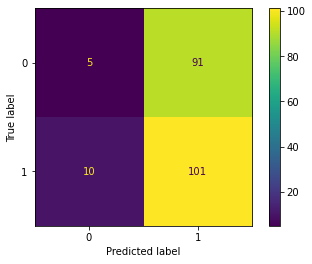

In [6]:
prediction=model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test) 
plt.show() 


In [7]:
print ('Accuracy:', accuracy_score(y_test, prediction))

print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))


Accuracy: 0.5120772946859904
Recall: 0.9099099099099099
Precision: 0.5260416666666666


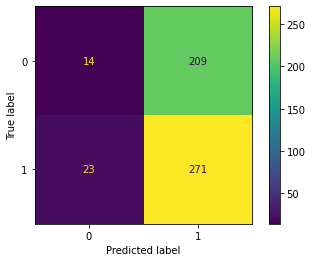

In [8]:
plot_confusion_matrix(model, X_train, y_train) 
plt.show()


In [9]:
prediction=model.predict(X_train)
print ('Accuracy:', accuracy_score(y_train, prediction))
print ('Recall:', recall_score(y_train, prediction))
print ('Precision:', precision_score(y_train, prediction))

Accuracy: 0.5512572533849129
Recall: 0.9217687074829932
Precision: 0.5645833333333333


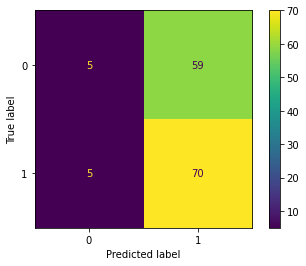

In [10]:
plot_confusion_matrix(model, X_val, y_val) 
plt.show()

In [11]:
prediction=model.predict(X_val)
print ('Accuracy:', accuracy_score(y_val, prediction))
print ('Recall:', recall_score(y_val, prediction))
print ('Precision:', precision_score(y_val, prediction))

Accuracy: 0.539568345323741
Recall: 0.9333333333333333
Precision: 0.5426356589147286


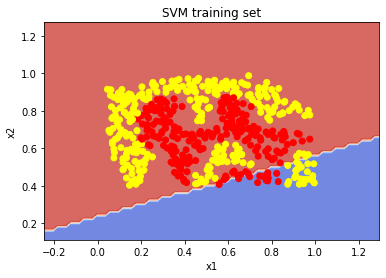

In [17]:
h=0.02
x_min_t, x_max_t = X_test[:, 0].min() - 0.3, X_test[:, 0].max() +0.3
y_min_t, y_max_t = X_test[:, 1].min() - 0.3, X_test[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min_t, x_max_t, h),np.arange(y_min_t, y_max_t, h))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
plt.xlabel('x1')
plt.ylabel('x2')

plt.title('SVM training set')

plt.show()

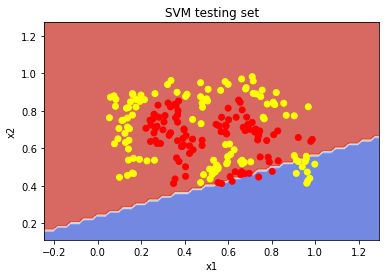

In [15]:
h=0.02
x_min_t, x_max_t = X_test[:, 0].min() - 0.3, X_test[:, 0].max() +0.3
y_min_t, y_max_t = X_test[:, 1].min() - 0.3, X_test[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min_t, x_max_t, h),np.arange(y_min_t, y_max_t, h))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='autumn')
plt.xlabel('x1')
plt.ylabel('x2')

plt.title('SVM testing set')

plt.show()

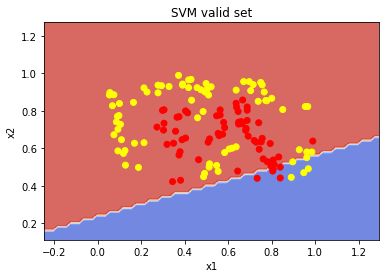

In [16]:
h=0.02
x_min_t, x_max_t = X_test[:, 0].min() - 0.3, X_test[:, 0].max() +0.3
y_min_t, y_max_t = X_test[:, 1].min() - 0.3, X_test[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min_t, x_max_t, h), np.arange(y_min_t, y_max_t, h))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='autumn')
plt.xlabel('x1')
plt.ylabel('x2')

plt.title('SVM valid set')

plt.show()